---

# <center>멤버십 고객 탈회 예측</center>

컬럼 | 설명 | 컬럼 | 설명
---|---|---|---
id | 멤버십 번호 | MEMBERSHIP_TERM_YEARS | 멤버십 기간
ANNUAL_FEES | 연간 회비 | MEMBER_MARITAL_STATUS | 기혼 여부, M(기혼), S(미혼)
MEMBER_GENDER | 성별, M(남),F(여) | MEMBER_ANNUAL_INCOME | 연봉(연간 수입)
MEMBER_OCCUPATION_CD | 직업 | MEMBERSHIP_PACKAGE | 멤버십 유형
MEMBER_AGE_AT_ISSUE | 나이 | ADDITIONAL_MEMBERS | 가족 회원
PAYMENT_MODE | 지불 방식 | AGENT_CODE | 직원 코드 
START_DATE (YYYYMMDD) | 시작 날짜 | END_DATE  (YYYYMMDD) | 종료 날짜 
MEMBERSHIP_STATUS | 0(유지), 1(탈회) | 

# Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Load Dataset

In [2]:
df = pd.read_csv('membership.csv')
df.head()

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,NaN
1,1,88,149029.58,NaN,M,NaN,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,NaN
2,2,93,102999.94,NaN,M,600000.0,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531,NaN
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331,NaN
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313,NaN


In [3]:
# 기본 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     8807 non-null   int64  
 1   MEMBERSHIP_TERM_YEARS  8807 non-null   int64  
 2   ANNUAL_FEES            8807 non-null   float64
 3   MEMBER_MARITAL_STATUS  6597 non-null   object 
 4   MEMBER_GENDER          8305 non-null   object 
 5   MEMBER_ANNUAL_INCOME   7338 non-null   float64
 6   MEMBER_OCCUPATION_CD   8773 non-null   float64
 7   MEMBERSHIP_PACKAGE     8807 non-null   object 
 8   MEMBER_AGE_AT_ISSUE    8807 non-null   int64  
 9   ADDITIONAL_MEMBERS     8807 non-null   int64  
 10  PAYMENT_MODE           8807 non-null   object 
 11  AGENT_CODE             8807 non-null   object 
 12  MEMBERSHIP_STATUS      8807 non-null   int64  
 13  START_DATE             8807 non-null   int64  
 14  END_DATE               2671 non-null   float64
dtypes: f

## Pandas 시각화

In [4]:
df['MEMBERSHIP_STATUS'].value_counts()

MEMBERSHIP_STATUS
0    6136
1    2671
Name: count, dtype: int64

<Axes: ylabel='MEMBERSHIP_STATUS'>

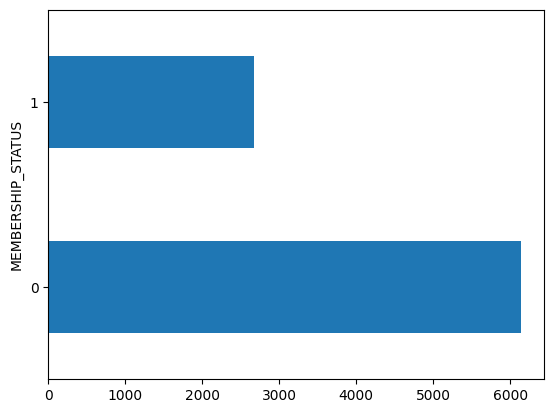

In [5]:
df['MEMBERSHIP_STATUS'].value_counts().plot(kind='barh')

In [6]:
df['MEMBERSHIP_TERM_YEARS']

0       22
1       88
2       93
3       17
4       39
        ..
8802    17
8803    49
8804    54
8805    27
8806    12
Name: MEMBERSHIP_TERM_YEARS, Length: 8807, dtype: int64

<Axes: ylabel='Frequency'>

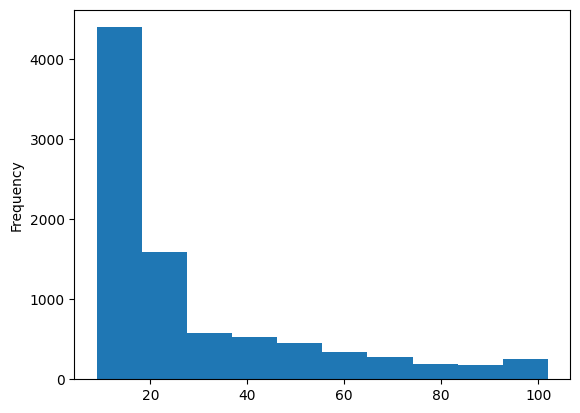

In [7]:
df['MEMBERSHIP_TERM_YEARS'].plot(kind='hist')

<Axes: >

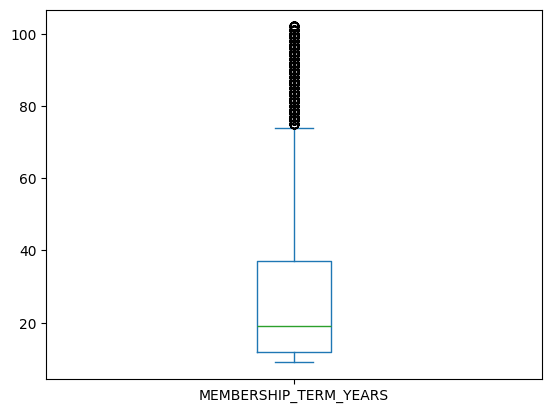

In [8]:
df['MEMBERSHIP_TERM_YEARS'].plot(kind='box')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'MEMBERSHIP_TERM_YEARS'}>,
        <Axes: title={'center': 'ANNUAL_FEES'}>],
       [<Axes: title={'center': 'MEMBER_ANNUAL_INCOME'}>,
        <Axes: title={'center': 'MEMBER_OCCUPATION_CD'}>,
        <Axes: title={'center': 'MEMBER_AGE_AT_ISSUE'}>],
       [<Axes: title={'center': 'ADDITIONAL_MEMBERS'}>,
        <Axes: title={'center': 'MEMBERSHIP_STATUS'}>,
        <Axes: title={'center': 'START_DATE'}>],
       [<Axes: title={'center': 'END_DATE'}>, <Axes: >, <Axes: >]],
      dtype=object)

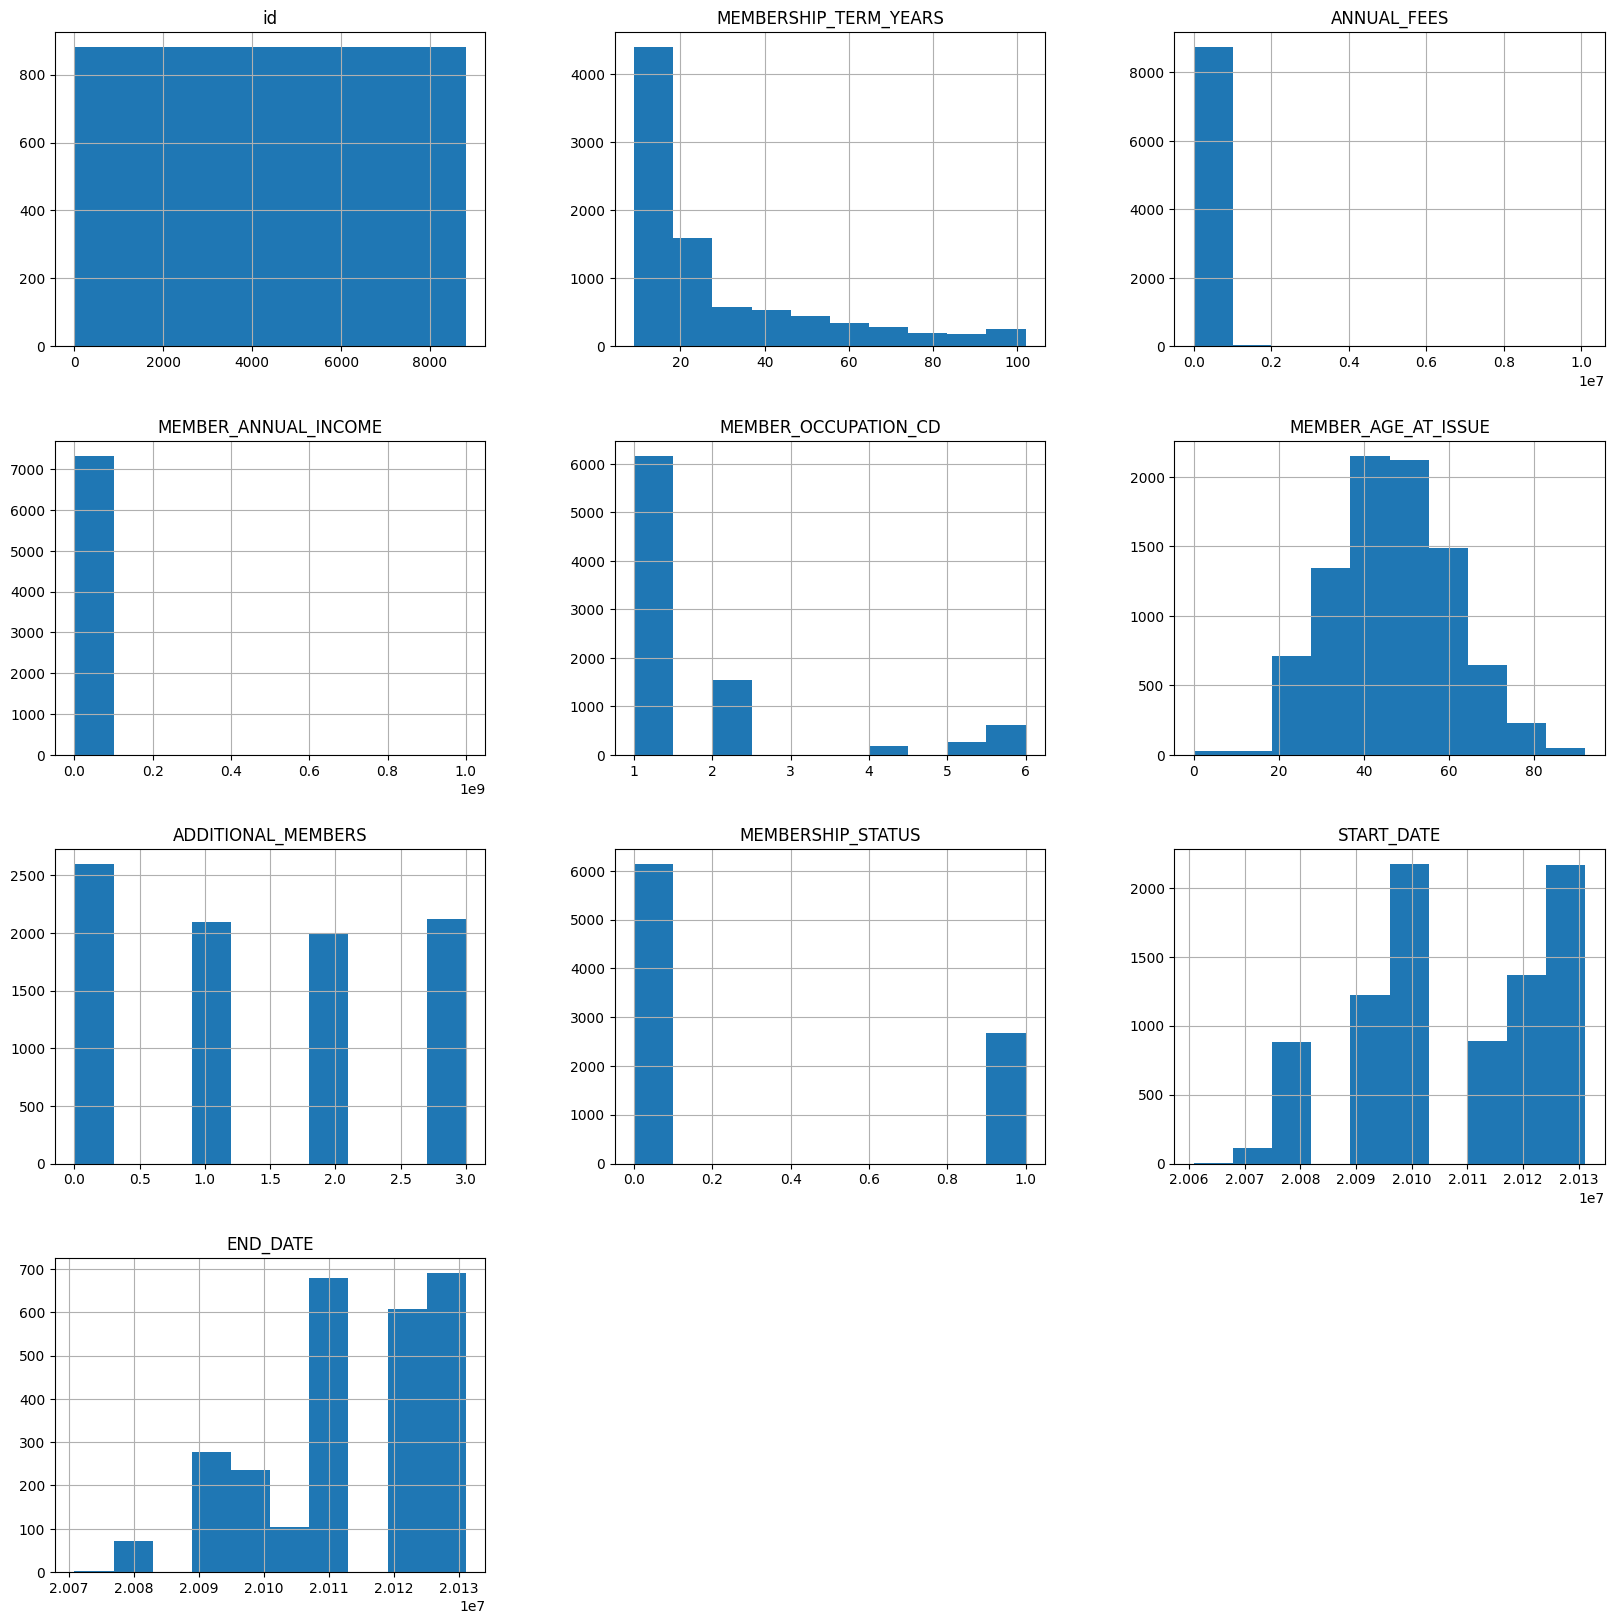

In [9]:
df.hist(figsize=(20, 20))

# 여러 개의 그래프를 동시에 표시 - subplot 사용법

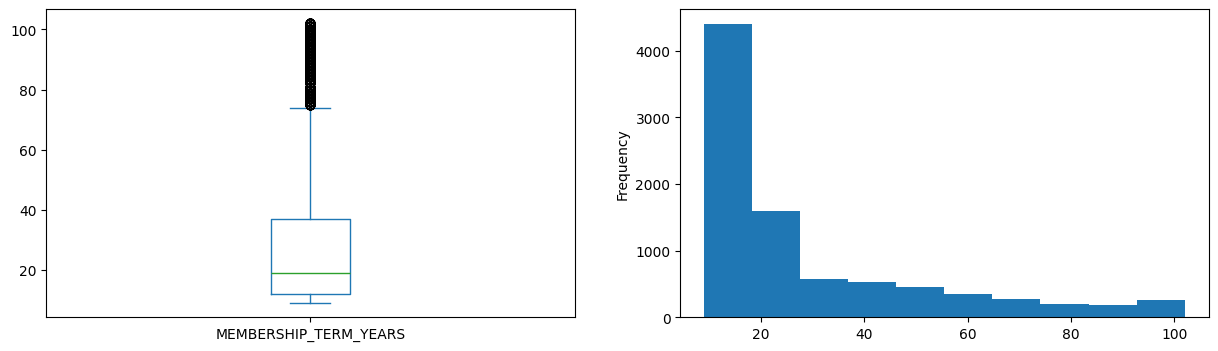

In [10]:
# MATLAB 스타일

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)      # 세로 개수, 가로 개수, 차트 순서
df['MEMBERSHIP_TERM_YEARS'].plot(kind='box')

plt.subplot(1, 2, 2)
df['MEMBERSHIP_TERM_YEARS'].plot(kind='hist')

plt.show()

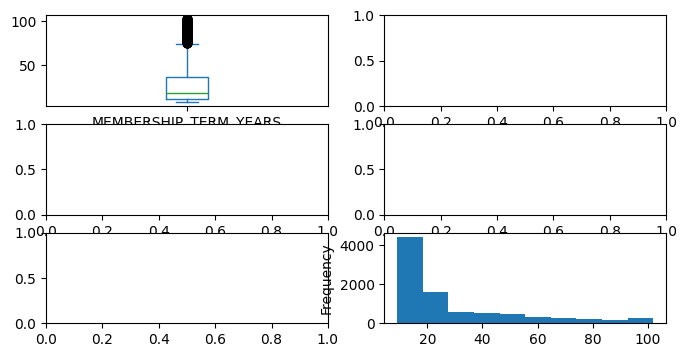

In [11]:
# 객체지향 스타일

fig, ax = plt.subplots(3, 2, figsize=(8, 4)) 

df['MEMBERSHIP_TERM_YEARS'].plot(kind='box', ax=ax[0, 0])
df['MEMBERSHIP_TERM_YEARS'].plot(kind='hist', ax=ax[2, 1])

plt.show()

In [12]:
print(fig)

Figure(800x400)


In [13]:
print(ax)

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: ylabel='Frequency'>]]


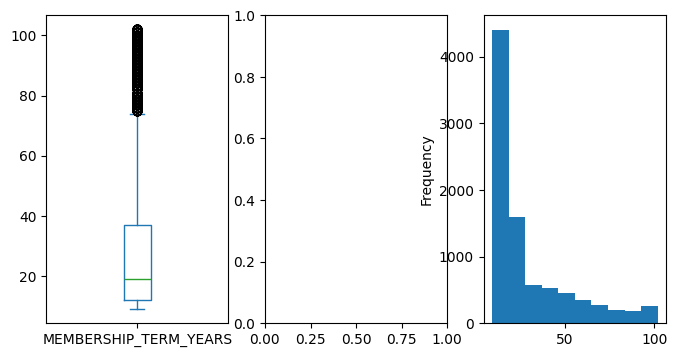

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(8, 4)) 

df['MEMBERSHIP_TERM_YEARS'].plot(kind='box', ax=ax[0])
df['MEMBERSHIP_TERM_YEARS'].plot(kind='hist', ax=ax[2])

plt.show()

# Seaborn 시각화

In [15]:
df.head(2)

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,NaN
1,1,88,149029.58,NaN,M,NaN,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,NaN


## 범주형 변수의 수량을 시각화

In [16]:
categorical_cols = ['MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 
                    'MEMBERSHIP_PACKAGE', 'MEMBER_OCCUPATION_CD', 
                    'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS',
                   ]

### Count Plot  

In [17]:
df['MEMBER_MARITAL_STATUS'].value_counts(dropna=False)

MEMBER_MARITAL_STATUS
M      5455
NaN    2210
S       977
W       128
D        37
Name: count, dtype: int64

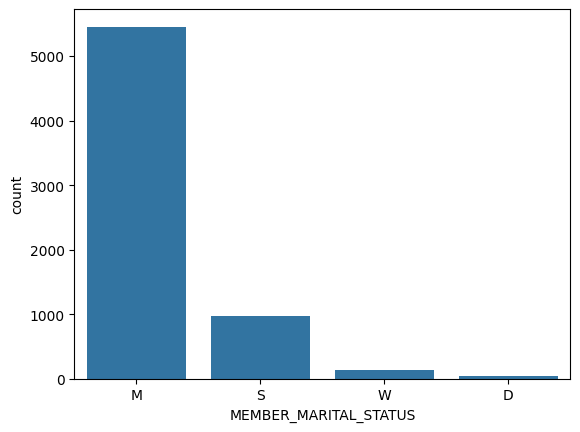

In [18]:
sns.countplot(data=df, x='MEMBER_MARITAL_STATUS');

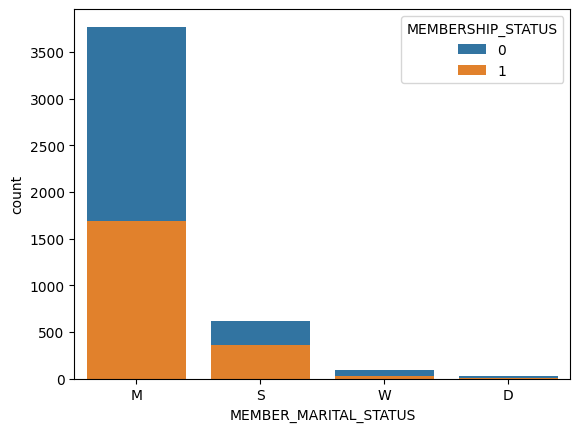

In [19]:
sns.countplot(data=df, x='MEMBER_MARITAL_STATUS', hue='MEMBERSHIP_STATUS', dodge=False);

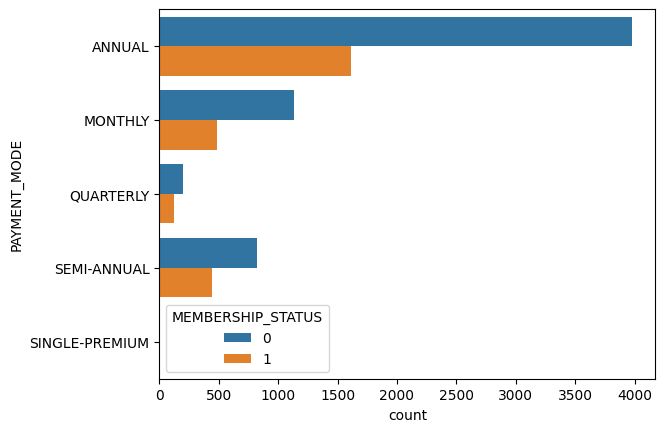

In [20]:
sns.countplot(data=df, y='PAYMENT_MODE', hue='MEMBERSHIP_STATUS');

## [실습]
다른 범주형 변수를 찾아서, countplot으로 데이터의 수량을 시각화합니다. 

## 연속형 변수의 분포를 시각화

In [21]:
numeric_cols = ['MEMBERSHIP_TERM_YEARS','ANNUAL_FEES','MEMBER_ANNUAL_INCOME',
                'MEMBER_AGE_AT_ISSUE','ADDITIONAL_MEMBERS',
                'START_DATE (YYYYMMDD)','END_DATE  (YYYYMMDD)']

## Distribution Plot

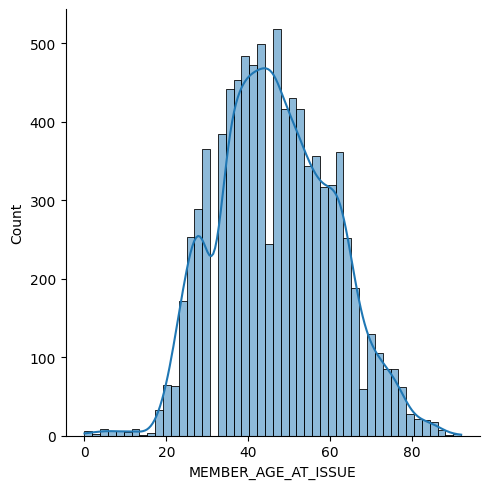

In [22]:
sns.displot(df['MEMBER_AGE_AT_ISSUE'], kde=True);

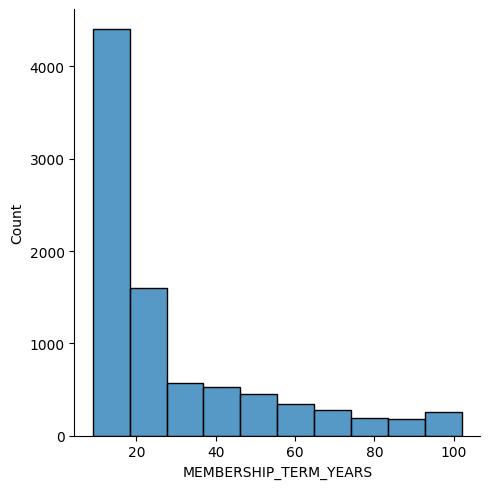

In [23]:
sns.displot(data=df, x='MEMBERSHIP_TERM_YEARS', kind='hist', bins=10)

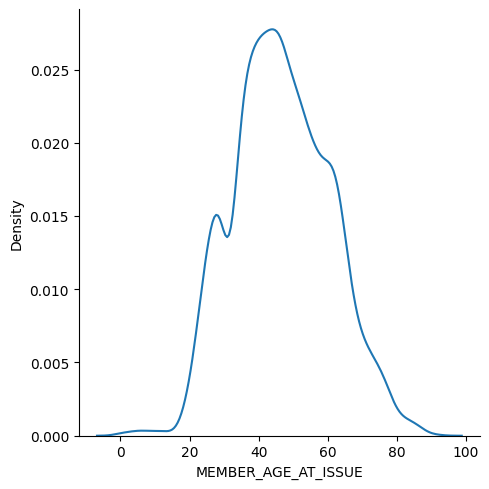

In [24]:
sns.displot(x='MEMBER_AGE_AT_ISSUE', kind='kde', data=df);

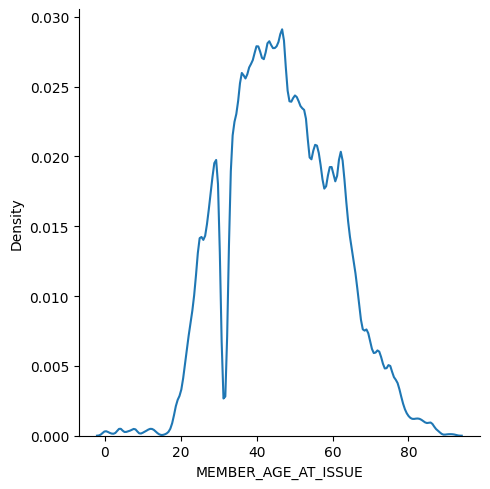

In [25]:
sns.displot(x='MEMBER_AGE_AT_ISSUE', kind='kde', data=df, bw_adjust=0.3);

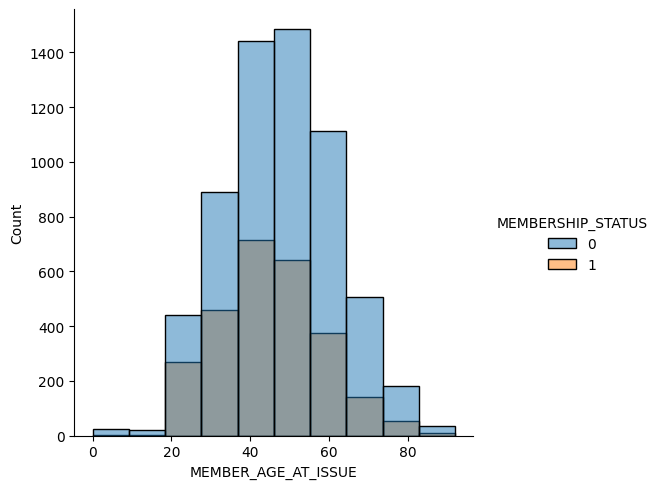

In [26]:
sns.displot(x='MEMBER_AGE_AT_ISSUE', hue='MEMBERSHIP_STATUS', data=df, bins=10);

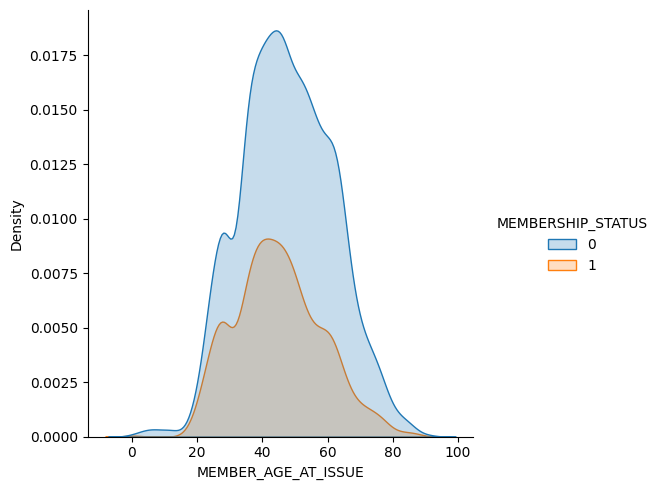

In [27]:
sns.displot(x='MEMBER_AGE_AT_ISSUE', hue='MEMBERSHIP_STATUS', kind='kde', data=df, fill=True);

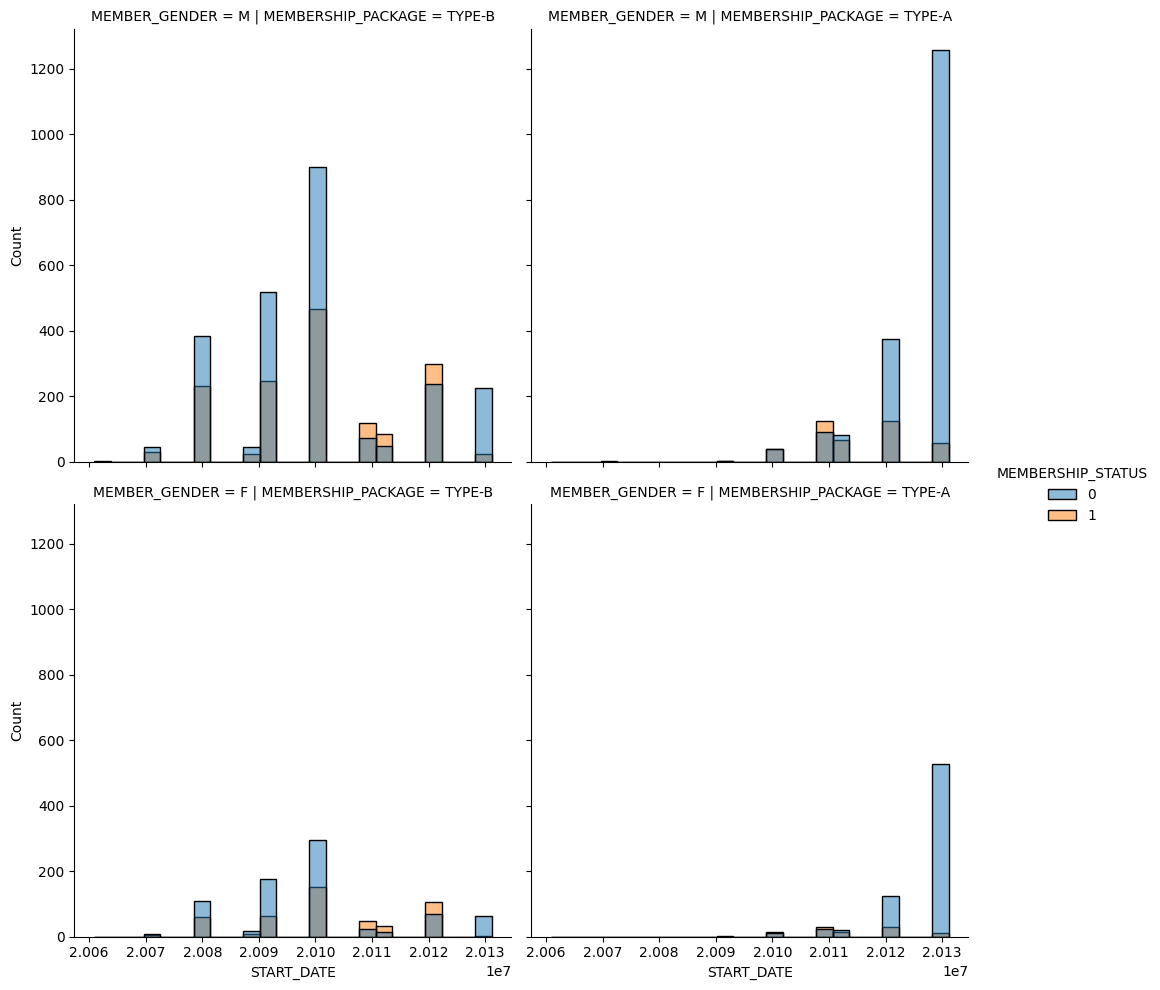

In [28]:
sns.displot(row='MEMBER_GENDER', col='MEMBERSHIP_PACKAGE', x='START_DATE', hue='MEMBERSHIP_STATUS', kind='hist', data=df);

## Histplot

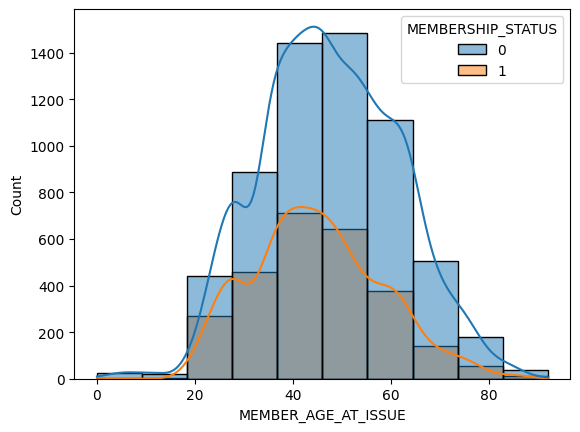

In [55]:
sns.histplot(x='MEMBER_AGE_AT_ISSUE', hue='MEMBERSHIP_STATUS', data=df, bins=10, kde=True);

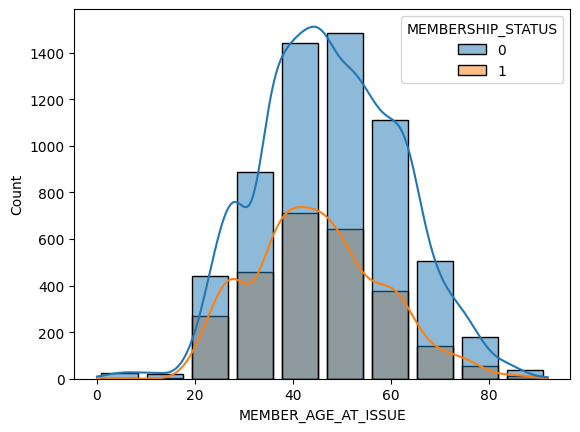

In [56]:
sns.histplot(x='MEMBER_AGE_AT_ISSUE', hue='MEMBERSHIP_STATUS', data=df, bins=10, kde=True, shrink=0.8);

## KDE Plot

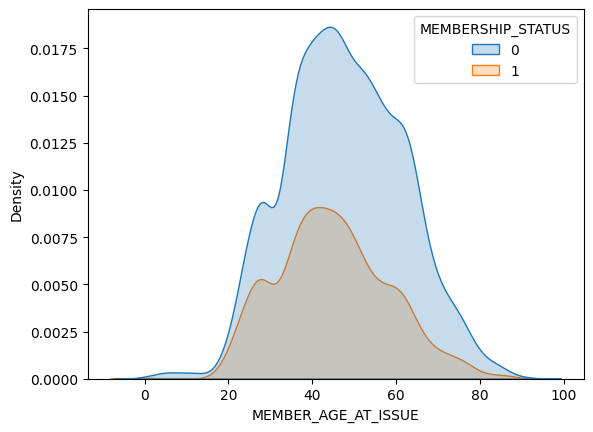

In [57]:
sns.kdeplot(x='MEMBER_AGE_AT_ISSUE', hue='MEMBERSHIP_STATUS', data=df, fill=True);

## Box Plot

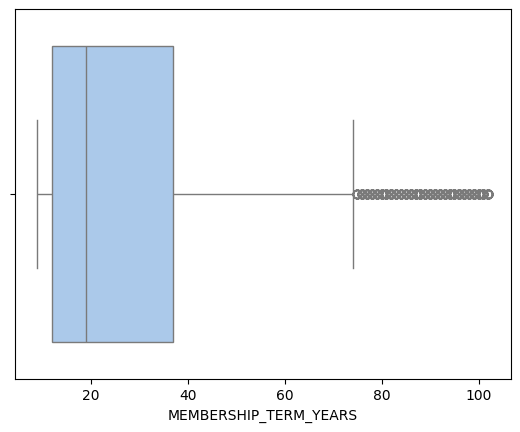

In [29]:
sns.boxplot(x='MEMBERSHIP_TERM_YEARS', data=df, palette='pastel');

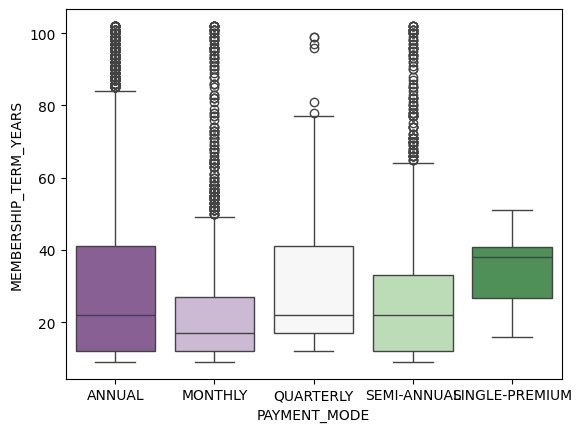

In [30]:
sns.boxplot(x='PAYMENT_MODE', y='MEMBERSHIP_TERM_YEARS', data=df, palette="PRGn");

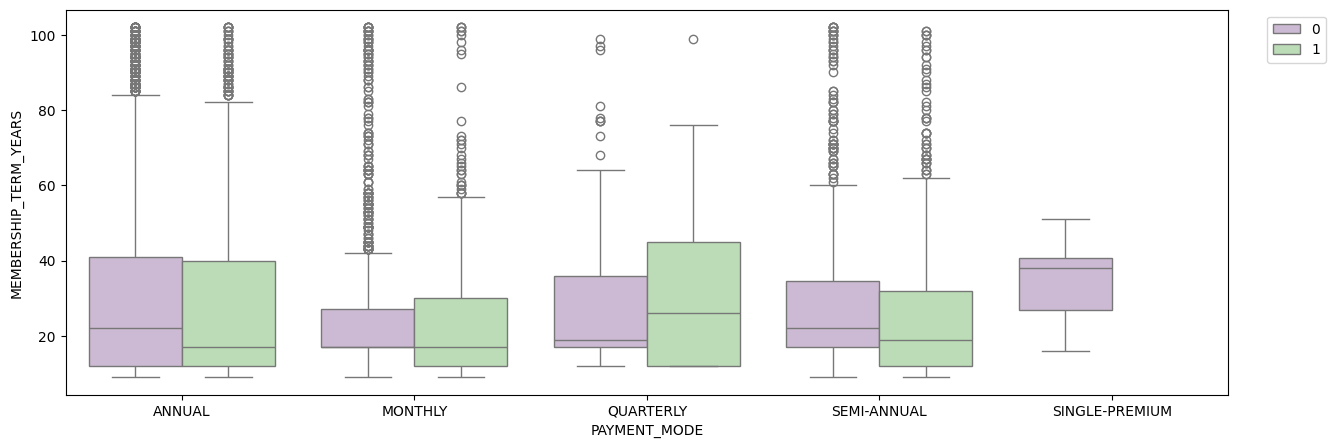

In [31]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='PAYMENT_MODE', y='MEMBERSHIP_TERM_YEARS', hue='MEMBERSHIP_STATUS', data=df, palette="PRGn")
plt.legend(bbox_to_anchor=(1.09, 1))
plt.show()

## Violin Plot

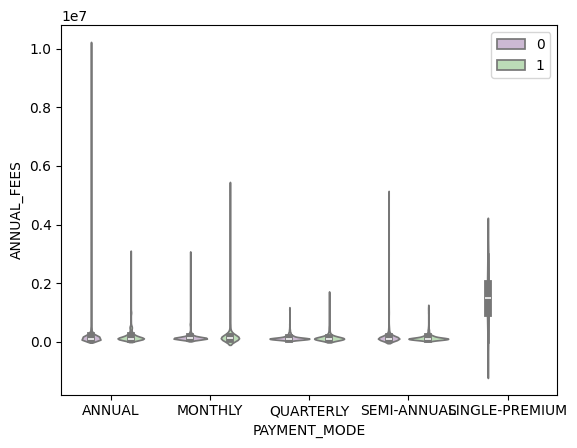

In [32]:
sns.violinplot(x='PAYMENT_MODE', y='ANNUAL_FEES', hue="MEMBERSHIP_STATUS", data=df, palette="PRGn")
plt.legend(loc="upper right")
plt.show()

## Strip Plot

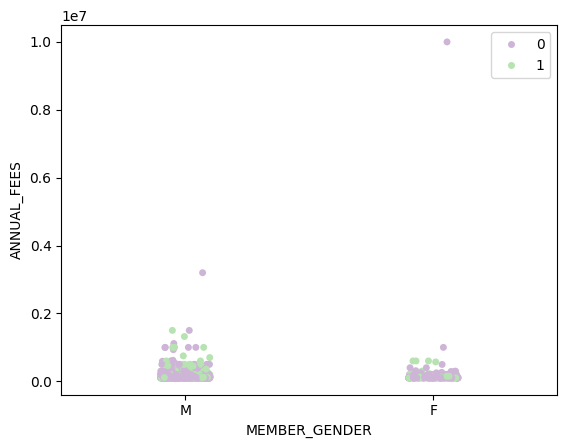

In [33]:
sns.stripplot(x='MEMBER_GENDER', y='ANNUAL_FEES', hue="MEMBERSHIP_STATUS", data=df.sample(1000), palette="PRGn")
plt.legend(loc="upper right")
plt.show()

## Bar Plot

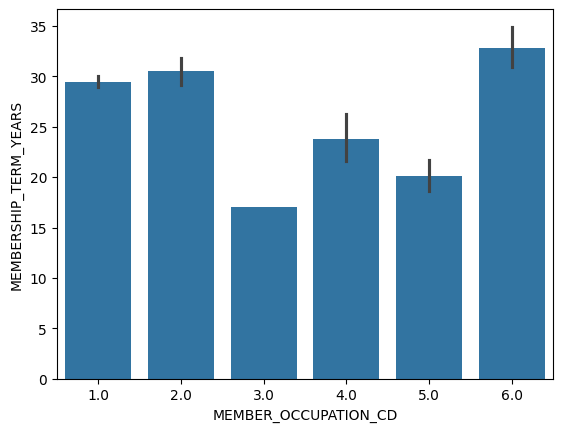

In [34]:
sns.barplot(x='MEMBER_OCCUPATION_CD', y='MEMBERSHIP_TERM_YEARS', data=df);

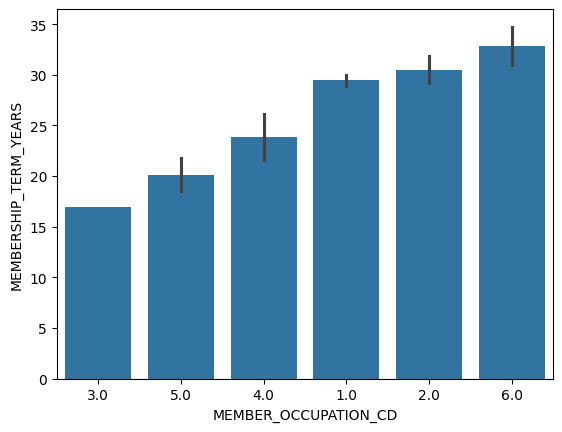

In [48]:
sns.barplot(x='MEMBER_OCCUPATION_CD', y='MEMBERSHIP_TERM_YEARS', data=df, order=[3.0, 5.0, 4.0, 1.0, 2.0, 6.0]);

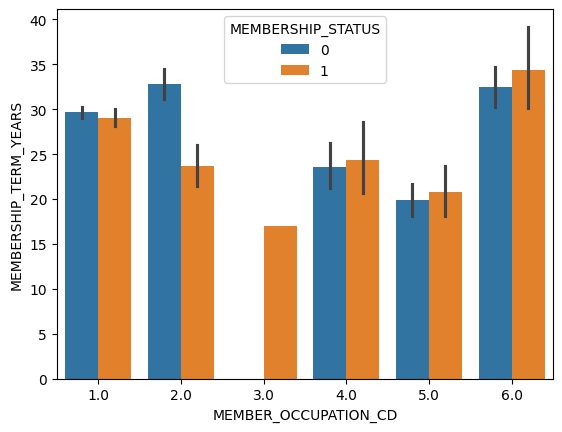

In [51]:
sns.barplot(x='MEMBER_OCCUPATION_CD', y='MEMBERSHIP_TERM_YEARS', hue='MEMBERSHIP_STATUS', data=df);

In [37]:
# 데이터 정렬

sorted_index = df.loc[:, ['MEMBER_OCCUPATION_CD', 'MEMBERSHIP_TERM_YEARS']].groupby('MEMBER_OCCUPATION_CD').mean().sort_values(by='MEMBERSHIP_TERM_YEARS', ascending=False).index
sorted_index

Index([6.0, 2.0, 1.0, 4.0, 5.0, 3.0], dtype='float64', name='MEMBER_OCCUPATION_CD')

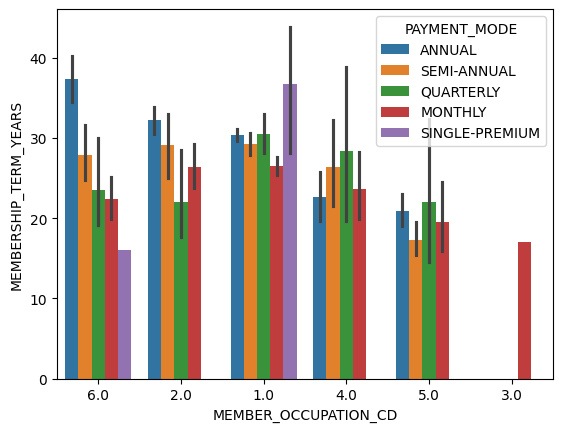

In [54]:
sns.barplot(x='MEMBER_OCCUPATION_CD', y='MEMBERSHIP_TERM_YEARS', 
            hue='PAYMENT_MODE', hue_order=['ANNUAL', 'SEMI-ANNUAL', 'QUARTERLY', 'MONTHLY', 'SINGLE-PREMIUM'], 
            data=df, order=sorted_index);

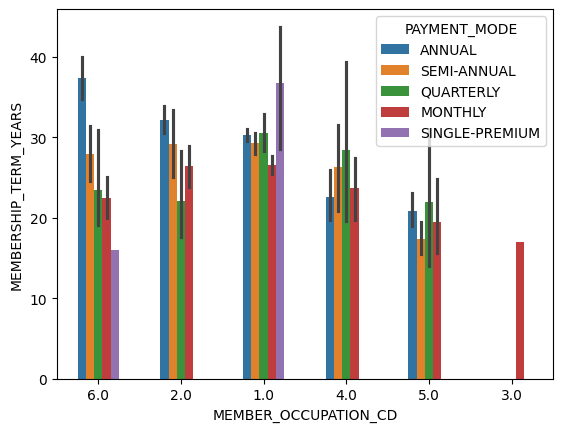

In [59]:
sns.barplot(x='MEMBER_OCCUPATION_CD', y='MEMBERSHIP_TERM_YEARS', 
            hue='PAYMENT_MODE', hue_order=['ANNUAL', 'SEMI-ANNUAL', 'QUARTERLY', 'MONTHLY', 'SINGLE-PREMIUM'], 
            width=0.5,
            data=df, order=sorted_index);

## 두 변수 간의 관계

## Scatter Plot

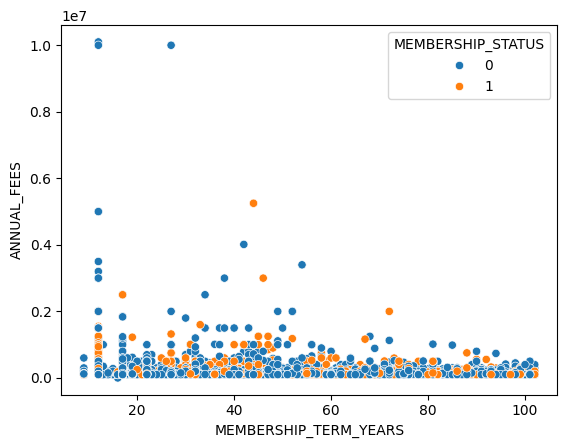

In [39]:
sns.scatterplot(x='MEMBERSHIP_TERM_YEARS', y='ANNUAL_FEES', hue='MEMBERSHIP_STATUS', data=df)
plt.show()

## LM Plot

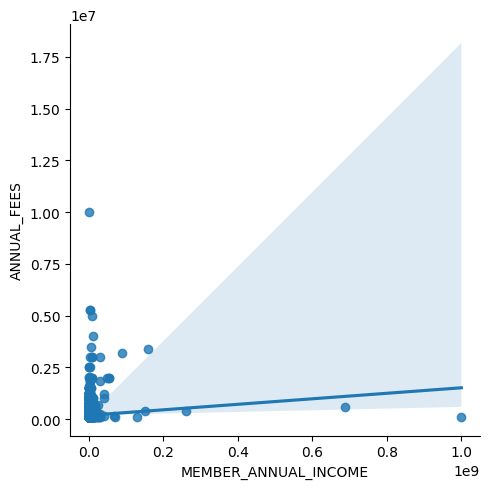

In [40]:
sns.lmplot(x='MEMBER_ANNUAL_INCOME', y='ANNUAL_FEES', data=df)
plt.show()

## KDE Plot

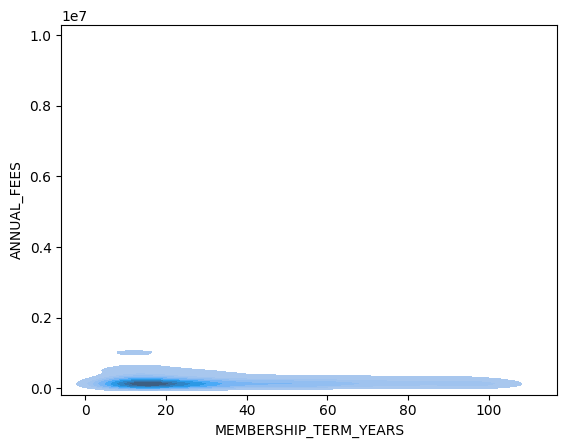

In [41]:
sns.kdeplot(x='MEMBERSHIP_TERM_YEARS', y='ANNUAL_FEES', data=df, shade=True);

## Joint Plot

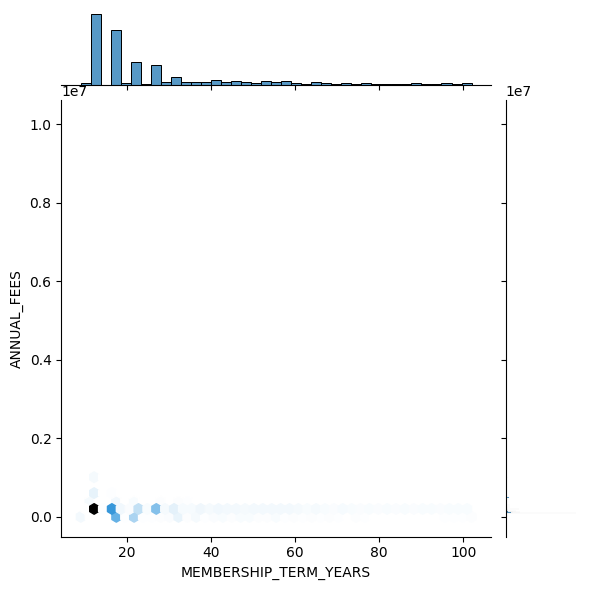

In [42]:
sns.jointplot(x='MEMBERSHIP_TERM_YEARS', y='ANNUAL_FEES', kind='hex', data=df)

## Heatmap

In [45]:
# 상관계수 테이블
corr_tb = df.corr(numeric_only=True)
corr_tb

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,MEMBERSHIP_STATUS,START_DATE,END_DATE
id,1.000000,0.014465,-0.008014,0.005423,0.006520,-0.008715,-0.021349,-0.005382,-0.002957,-0.034563
MEMBERSHIP_TERM_YEARS,0.014465,1.000000,-0.006872,0.022813,-0.005320,-0.020482,-0.219511,-0.037657,0.076482,0.030840
ANNUAL_FEES,-0.008014,-0.006872,1.000000,0.077744,-0.024174,0.024164,0.010806,0.026491,0.049064,0.114530
MEMBER_ANNUAL_INCOME,0.005423,0.022813,0.077744,1.000000,-0.002781,-0.040558,0.000318,-0.011411,0.013556,0.011817
MEMBER_OCCUPATION_CD,0.006520,-0.005320,-0.024174,-0.002781,1.000000,0.340926,-0.015147,-0.068543,0.172682,0.109063
MEMBER_AGE_AT_ISSUE,-0.008715,-0.020482,0.024164,-0.040558,0.340926,1.000000,0.058676,-0.090432,0.203004,0.185605
ADDITIONAL_MEMBERS,-0.021349,-0.219511,0.010806,0.000318,-0.015147,0.058676,1.000000,-0.021556,-0.069810,-0.023902
MEMBERSHIP_STATUS,-0.005382,-0.037657,0.026491,-0.011411,-0.068543,-0.090432,-0.021556,1.000000,-0.186712,NaN
START_DATE,-0.002957,0.076482,0.049064,0.013556,0.172682,0.203004,-0.069810,-0.186712,1.000000,0.881774
END_DATE,-0.034563,0.030840,0.114530,0.011817,0.109063,0.185605,-0.023902,NaN,0.881774,1.000000


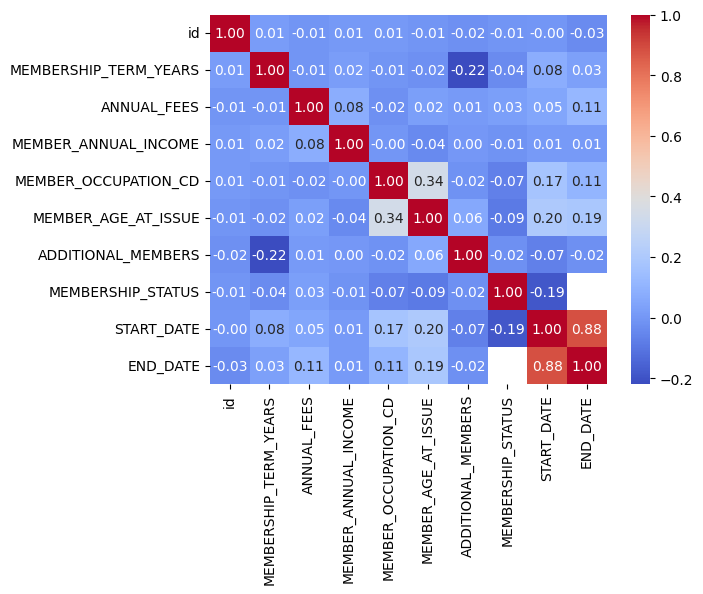

In [46]:
# 상관계수 히트맵
sns.heatmap(corr_tb, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## [실습]
- 시본의 함수를 이용하여 시각화 실습합니다.